<a href="https://colab.research.google.com/github/CDdohyun/ai4ml/blob/main/w10_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# W10 - Training, evaluating, selecting a model & Classification 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Try Ch2 codes

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [ ]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [ ]:
fetch_housing_data()  #데이터 다운로드

In [ ]:
import pandas as pd   #코랩으로 데이터 가져오기
import numpy as np

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [ ]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
from sklearn.model_selection import train_test_split   #(3) using 'train_test_split' (recommend)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [ ]:
housing["income_cat"] = pd.cut(housing["median_income"],    # 변수 크기에 따라 계층화된 범주형 변수 생성
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],  #범주간 경계 지정
                               labels=[1, 2, 3, 4, 5])  #5계층으로 나눔

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit   #train, test split하면서 각각 세트에 'income_cat'을 생성

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [ ]:
housing = strat_train_set.copy()  # .copy() 로 [train set + 계층화] 된 데이터 복사본 생성(housing)

In [ ]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]  # (지역별) 가구 수 대비 방 갯수 (비율)
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"] # 방 갯수 대비 침실 갯수 (비율)
housing["population_per_household"] = housing["population"]/housing["households"]  # 가구 수 대비 인구 수 (1가구 당 평균 몇명인가)

In [ ]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

In [ ]:
housing = strat_train_set.drop("median_house_value", axis=1) # drop 'labels' for training set (목표 변수인 집값을 제거)
housing_labels = strat_train_set["median_house_value"].copy()  # 복사본 저장

In [ ]:
housing_num = housing.drop("ocean_proximity", axis=1)   # drop all 'categorical' variable (to calculete 'median' -> numeric)
# alternatively: housing_num = housing.select_dtypes(include=[np.number])

In [ ]:
housing_cat = housing[["ocean_proximity"]]  # '순서'가 있는 '문자'로 된 '범주형' 변수
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [ ]:
from sklearn.impute import SimpleImputer  # recommended method (using sklearn) : SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder  # 또 다른 변환 방식 (highly recommended)
from sklearn.base import BaseEstimator, TransformerMixin  #3가지 _per_ 변수를 transform으로 추가해보자.

col_names = "total_rooms", "total_bedrooms", "population", "households"
rooms_ix, bedrooms_ix, population_ix, households_ix = [
    housing.columns.get_loc(c) for c in col_names] # get the column indices (3, 4, 5, 6 으로 직접 위치를 찾아서 지정하는게 아니라 자동으로 찾아줌)

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):  # transformer 들은 class로 생성해야 한다.
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do : fit 부분은 건드릴 필요가 없다.
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]   #1번째 추가변수
        population_per_household = X[:, population_ix] / X[:, households_ix] #2번째 추가변수
        if self.add_bedrooms_per_room:         #3번째 추가변수는 연구자의 선택에 따라 추가 여부 결정하도록 함
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [ ]:
from sklearn.pipeline import Pipeline    #복잡한 transform을 이해하기 쉬운 형태로 만드는 함수 : Pipeline()
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([   # fill NaN , add columns , scaling 을 한번에 처리하는 복잡한 transform을 직관적으로 표현
        ('imputer', SimpleImputer(strategy="median")), # fill
        ('attribs_adder', CombinedAttributesAdder()),  # add
        ('std_scaler', StandardScaler()),              # scale (위에서부터 순서대로 처리됨)
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)  # Pipeline() 자체가 하나의 Estimator처럼 됨. .transform() 바로적용

In [ ]:
housing_num_tr

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.01739526,
         0.00622264, -0.12112176],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.56925554,
        -0.04081077, -0.81086696],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.01802432,
        -0.07537122, -0.33827252],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.5092404 ,
        -0.03743619,  0.32286937],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.32814891,
        -0.05915604, -0.45702273],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.01407228,
         0.00657083, -0.12169672]])

In [ ]:
from sklearn.compose import ColumnTransformer  # 범주형 변수인 것까지도 처리하려면?

num_attribs = list(housing_num)  # 기존에 있던 변수
cat_attribs = ["ocean_proximity"]  # 범주형 변수 지정

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),    # 기존에 만들어뒀던 Pipeline에
        ("cat", OneHotEncoder(), cat_attribs), # 또 다른 transform method를 추가할 수 있다(One-hot)
    ])

housing_prepared = full_pipeline.fit_transform(housing)  # 최종 형태

In [ ]:
housing_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
from sklearn.linear_model import LinearRegression  # sklearn 으로 검색해서 가능한 fit 방법을 찾자.

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [ ]:
# let's try the full preprocessing pipeline on a few training instances
some_data = housing.iloc[:5]           # x (data)
some_labels = housing_labels.iloc[:5]  # y (labels = true value)
some_data_prepared = full_pipeline.transform(some_data)  # x 전처리

print("Predictions:", lin_reg.predict(some_data_prepared))  # y를 추정 (fitted value)

Predictions: [ 83811.08312039 314388.27147935 145641.85902864 183704.64921202
 238729.66725745]


In [ ]:
from sklearn.metrics import mean_squared_error   # metrics (이것도 구글링하면 다 나옴)

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)  # mse
lin_rmse = np.sqrt(lin_mse)  # rmse
lin_rmse

68376.51254853733

In [ ]:
from sklearn.metrics import mean_absolute_error  # mae

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

49507.34233776102

In [ ]:
from sklearn.tree import DecisionTreeRegressor  # another model

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=42)

In [ ]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [ ]:
from sklearn.model_selection import cross_val_score  # cv (k-fold cv)

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)  # 10-fold cv
tree_rmse_scores = np.sqrt(-scores)  # scores = 음수라서 루트 씌울때 - 붙임

In [ ]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())   # our metrics (rmse with 10-fold cv)
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [72237.45096271 69208.53094621 69286.11573206 70612.13634405
 70577.30202088 76840.97092314 71823.83279699 72710.22512908
 67780.77127665 71678.17802175]
Mean: 71275.55141535088
Standard deviation: 2362.02756776275


In [ ]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,  # tree 대신 선형회귀
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)  # rmse가 더 작다 -> better model
display_scores(lin_rmse_scores)

Scores: [71523.78333874 64044.46774989 67454.97869698 68514.10137273
 66303.62531226 72166.63405138 74464.08841381 68570.11804395
 66063.64175868 69870.86192291]
Mean: 68897.63006613276
Standard deviation: 3002.746127534861


In [ ]:
scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count       10.000000
mean     68897.630066
std       3165.172333
min      64044.467750
25%      66591.463658
50%      68542.109708
75%      71110.552985
max      74464.088414
dtype: float64

In [ ]:
from sklearn.svm import SVR  # another good model

svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

106873.526604078

In [ ]:
from sklearn.model_selection import cross_val_score

svm_scores = cross_val_score(svm_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
svm_rmse_scores = np.sqrt(-svm_scores)
display_scores(svm_rmse_scores)

Scores: [106846.91418486 108840.55721006 103122.02433423 109649.5401006
 103796.57205905 112219.65143015 109351.47147536 107877.83853403
 109166.01514235 108053.90140047]
Mean: 107892.44858711655
Standard deviation: 2590.6419916301356


- Try grid search CV and random search CV

In [ ]:
from sklearn.ensemble import RandomForestRegressor  # good model
from sklearn.model_selection import GridSearchCV  # find the best parameter using 'grid'

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},  # 1st try
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},  # 2nd try
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
grid_search.best_params_   # which is the best parameter

{'max_features': 6, 'n_estimators': 30}

In [ ]:
grid_search.best_estimator_  # 'model' using the best parameter

RandomForestRegressor(max_features=6, n_estimators=30, random_state=42)

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)  # all results(rmse) using grid search

64794.30269596007 {'max_features': 2, 'n_estimators': 3}
56170.628706376316 {'max_features': 2, 'n_estimators': 10}
53112.07892952066 {'max_features': 2, 'n_estimators': 30}
61836.14128922096 {'max_features': 4, 'n_estimators': 3}
54015.050600771814 {'max_features': 4, 'n_estimators': 10}
51501.312925751794 {'max_features': 4, 'n_estimators': 30}
59654.781331729675 {'max_features': 6, 'n_estimators': 3}
52654.921131020776 {'max_features': 6, 'n_estimators': 10}
50743.74265388978 {'max_features': 6, 'n_estimators': 30}
60051.26348940765 {'max_features': 8, 'n_estimators': 3}
52909.31100796091 {'max_features': 8, 'n_estimators': 10}
50800.78516244517 {'max_features': 8, 'n_estimators': 30}
63176.30025923348 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54596.210174483705 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60999.682580275425 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
53236.2602917408 {'bootstrap': False, 'max_features': 3, 'n_estimator

In [ ]:
from sklearn.model_selection import RandomizedSearchCV  # parameter space is too large -> randomize
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),  # test 'one' parameter among 1 ~ 200
        'max_features': randint(low=1, high=8),    # test 'one' parameter among 1 ~ 8
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,   # n_iter=10 : random search 10번 시도
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f5e29d42650>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f5e29d42c10>},
                   random_state=42, scoring='neg_mean_squared_error')

In [ ]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

49799.635737761106 {'max_features': 7, 'n_estimators': 180}
52293.114093913726 {'max_features': 5, 'n_estimators': 15}
51327.353255586764 {'max_features': 3, 'n_estimators': 72}
51528.97117998048 {'max_features': 5, 'n_estimators': 21}
49958.42482333546 {'max_features': 7, 'n_estimators': 122}
51270.531241462595 {'max_features': 3, 'n_estimators': 75}
51172.437672640175 {'max_features': 3, 'n_estimators': 88}
50255.14987044715 {'max_features': 5, 'n_estimators': 100}
50894.38729795359 {'max_features': 3, 'n_estimators': 150}
65022.070435017646 {'max_features': 5, 'n_estimators': 2}


In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances  # for tree-based model, we can check the 'importances' between columns

array([6.76445809e-02, 6.24744883e-02, 4.48349664e-02, 1.82692423e-02,
       1.78441912e-02, 1.96046284e-02, 1.81345873e-02, 2.43728155e-01,
       1.64552239e-01, 5.15312129e-02, 1.00601503e-01, 5.56925429e-02,
       1.39077386e-02, 1.13027019e-01, 8.79969201e-05, 2.68765993e-03,
       5.37724723e-03])

In [ ]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
#cat_encoder = cat_pipeline.named_steps["cat_encoder"] # old solution
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)  # high value -> high importance

[(0.24372815503486656, 'median_income'),
 (0.164552239433468, 'income_cat'),
 (0.11302701921836562, 'INLAND'),
 (0.1006015031515756, 'pop_per_hhold'),
 (0.06764458085326612, 'longitude'),
 (0.062474488288322035, 'latitude'),
 (0.055692542877701014, 'bedrooms_per_room'),
 (0.051531212925316115, 'rooms_per_hhold'),
 (0.04483496644921273, 'housing_median_age'),
 (0.019604628363310554, 'population'),
 (0.018269242313755225, 'total_rooms'),
 (0.018134587277114467, 'households'),
 (0.01784419116603477, 'total_bedrooms'),
 (0.013907738567035368, '<1H OCEAN'),
 (0.005377247230746392, 'NEAR OCEAN'),
 (0.0026876599298535937, 'NEAR BAY'),
 (8.799692005595001e-05, 'ISLAND')]

- Check what other parameters are available for RandomForestRegressor, try your own grid search CV or random search CV

In [ ]:
from sklearn.ensemble import RandomForestRegressor  # good model

RandomForestRegressor?  # or, get googling

### Try Ch3 codes

In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Is this notebook running on Colab or Kaggle?
IS_COLAB = "google.colab" in sys.modules
IS_KAGGLE = "kaggle_secrets" in sys.modules

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
X, y = mnist["data"], mnist["target"]  
X.shape # (the number of data, width*height)

(70000, 784)

In [5]:
some_digit = X[0]  # 랜덤 이미지 1개(0번째)
some_digit_image = some_digit.reshape(28, 28)   # split y -> width, height

In [ ]:
y[0]  # 0번째 이미지의 'label' = y[0]

'5'

In [6]:
y = y.astype(np.uint8)

In [7]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]  # train set : 60000, test set : else

In [8]:
# 1. Binary classifier

y_train_5 = (y_train == 5)   # label == 5
y_test_5 = (y_test == 5)  # '5 or not 5' classifier

In [9]:
from sklearn.linear_model import SGDClassifier   # 가중치 최적화 방법 : SGD 인 classifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train_5)  # 5 or not -> binary classification

SGDClassifier(random_state=42)

In [ ]:
sgd_clf.predict([some_digit])  # some_digit -> a '5' image

array([ True])

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")  # 3-fold로 fit한 결과

array([0.95035, 0.96035, 0.9604 ])

In [ ]:
from sklearn.model_selection import StratifiedKFold  # 계통추출법 적용한 k-fold (5인 것보다 나머지 숫자인 경우가 훨 많으므로)
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.9669
0.91625
0.96785


In [10]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):  # label이 5가 아닌 데이터만 사용해 fit하는 classifier
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [ ]:
never_5_clf = Never5Classifier()   # 정확도가 90%임 (왜냐하면 10%만 5이고 나머지 90%는 5가 아니기 때문에 5가 아닌 경우만 학습함)
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")  # 5는 하나도 못맞추는데 정확도 90이다 -> 좋은걸까?
# 이 경우엔 metric을 accuracy로 사용하는 게 적절치 않을 수 있다. 이 문제는 불균형한 데이터에서 많이 발생

array([0.91125, 0.90855, 0.90915])

In [11]:
from sklearn.model_selection import cross_val_predict  # 예측값 도출하기

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [12]:
from sklearn.metrics import confusion_matrix  # 예측 결과를 분할표로 보기

confusion_matrix(y_train_5, y_train_pred)  # 왼쪽 위가 TN 

array([[53892,   687],
       [ 1891,  3530]])

In [13]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)  # precision = TP / (TP + FP)

0.8370879772350012

In [14]:
recall_score(y_train_5, y_train_pred)  # # recall = TP / (TP + FN)

0.6511713705958311

In [15]:
from sklearn.metrics import f1_score   # precision & recall

f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [16]:
# 모든 train data에 대한 prediction score를 구하는 방법
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

In [17]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [18]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-50000, 50000, 0, 1])             # Not shown



recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

Saving figure precision_vs_recall_plot


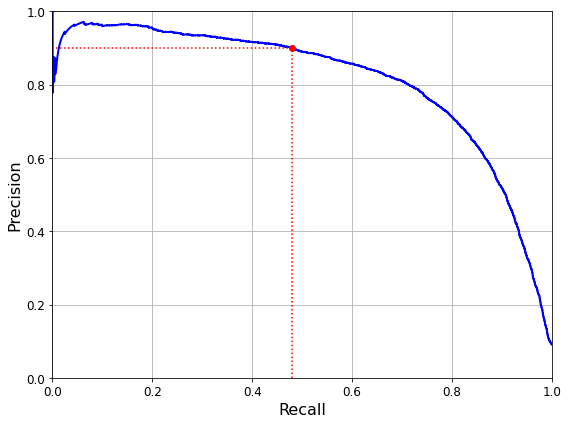

In [ ]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:")
plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r:")
plt.plot([recall_90_precision], [0.9], "ro")
save_fig("precision_vs_recall_plot")
plt.show()

In [19]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]  # precision이 90% 이상이 되도록하는 threshold

In [20]:
threshold_90_precision  # 아주 높은 값 -> 분류 기준이 엄격하다는 말임

3370.0194991439557

In [21]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [22]:
precision_score(y_train_5, y_train_pred_90)  # 실제로도 90% 가까이 나옴

0.9000345901072293

In [23]:
recall_score(y_train_5, y_train_pred_90)  # 그러나 recall값은? 낮게 나옴(기준이 엄격 -> 실제 5인 이미지 중 소수만이 5로 인정받는 결과)

0.4799852425751706

In [24]:
from sklearn.metrics import roc_curve  # recommended metrics for estimating the best threshold value : roc curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)  # 위에서 구한 y_scores 값이 사용됨.

Saving figure roc_curve_plot


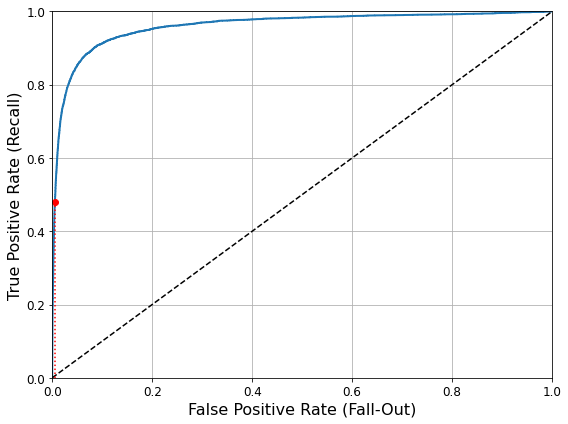

In [25]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                                    # Not shown
plot_roc_curve(fpr, tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]           # Not shown
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")   # Not shown
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")  # Not shown
plt.plot([fpr_90], [recall_90_precision], "ro")               # Not shown
save_fig("roc_curve_plot")                                    # Not shown
plt.show()   # red dot -> now we here

In [26]:
from sklearn.metrics import roc_auc_score  # metric of the 'model'

roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [ ]:
from sklearn.ensemble import RandomForestClassifier   # 좋은 모델 구성방법으로 알려짐
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

In [ ]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

In [ ]:
recall_for_forest = tpr_forest[np.argmax(fpr_forest >= fpr_90)]

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")
plt.plot([fpr_90], [recall_90_precision], "ro")
plt.plot([fpr_90, fpr_90], [0., recall_for_forest], "r:")
plt.plot([fpr_90], [recall_for_forest], "ro")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
save_fig("roc_curve_comparison_plot")
plt.show()

In [ ]:
roc_auc_score(y_train_5, y_scores_forest)  # 아주 좋음

In [ ]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
precision_score(y_train_5, y_train_pred_forest)

In [ ]:
recall_score(y_train_5, y_train_pred_forest)  # precision, recall 모두 좋음

In [ ]:
from sklearn.svm import SVC  # more than 3 classes : multi-class

svm_clf = SVC(gamma="auto", random_state=42)
svm_clf.fit(X_train[:1000], y_train[:1000]) # y_train(0, 1, 2, ..., 8, 9), not y_train_5
svm_clf.predict([some_digit])

In [ ]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

In [ ]:
np.argmax(some_digit_scores)  # predict 방법 : argmax

In [ ]:
svm_clf.classes_   # 가능한 class들

In [ ]:
# we make 0 or not, 1 or not, ... , 9 or not classifiers (total 10 binary classifiers) : OvR
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC(gamma="auto", random_state=42))
ovr_clf.fit(X_train[:1000], y_train[:1000])
ovr_clf.predict([some_digit])  # 10개의 결과 중 argmax를 고름

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()  # score값을 직관적으로 보여주기 위한 scale (0 ~ 1)
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

In [ ]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)  # 10x10 분할표
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

In [ ]:
from sklearn.neighbors import KNeighborsClassifier  # now, we have multiple labels (7 -> [odd, higher than 6])

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

In [ ]:
knn_clf.predict([some_digit])

In [ ]:
noise = np.random.randint(0, 100, (len(X_train), 784))  # multi-output problem
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test